In [4]:
import pandas as pd

data = pd.read_csv('dataset_Facebook.csv',sep=';')

In [18]:
data.loc[:,['Type']] = data.loc[:,['Type']].replace({'Photo':0,'Status':1,'Link':2,'Video':3})

In [19]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,0,2,12,4.0,3,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100
1,139441,1,2,12,3.0,10,0.0,10460.0,19057.0,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164
2,139441,0,3,12,3.0,3,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80
3,139441,0,2,12,2.0,10,1.0,50128.0,87991.0,2211.0,790.0,1119.0,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777
4,139441,0,2,12,2.0,3,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,19.0,325.0,49.0,393


In [20]:
data = data.dropna(axis = 0)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     441 non-null    int64  
 1   Type                                                                 441 non-null    int64  
 2   Category                                                             441 non-null    int64  
 3   Post Month                                                           441 non-null    int64  
 4   Post Weekday                                                         441 non-null    float64
 5   Post Hour                                                            441 non-null    int64  
 6   Paid                                                                 441 non-null    float64
 7   Lifetime

In [23]:
y = data['Paid']
X = data.drop('Paid',axis = 1)

In [24]:
try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold

In [41]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier(random_state=154) 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=145) 
train_scores, valid_scores = validation_curve(model, X, y, param_name='max_depth', param_range=range(1, 15),cv=cv, scoring='roc_auc')

Text(0, 0.5, 'ROC AUC')

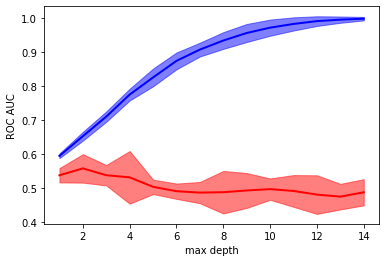

In [43]:
import numpy as np
import matplotlib.pyplot as plt 
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,15), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,15), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,15), train_score_mean, c='b', lw=2)
plt.plot(range(1,15), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

In [44]:
try:
    from sklearn.model_selection import RandomizedSearchCV 
except ImportError:
    from sklearn.cross_validation import RandomizedSearchCV
    
RND_SEED = 154

In [53]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 8),
    'min_samples_leaf': range(3, 10),
    'class_weight': [None, 'balanced']}

cv = StratifiedKFold(n_splits=5, random_state=145, shuffle=True)

model = DecisionTreeClassifier(random_state=145)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=160, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=145)

random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=145, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=145),
                   n_iter=160, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 8),
                                        'min_samples_leaf': range(3, 10)},
                   random_state=145, scoring='roc_auc')

In [54]:
random_search.best_params_

{'min_samples_leaf': 5,
 'max_depth': 2,
 'criterion': 'gini',
 'class_weight': 'balanced'}

In [55]:
random_search.best_score_

0.590375

In [56]:
best_model = random_search.best_estimator_;
best_model

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=5,
                       random_state=145)

In [57]:
model = random_search.best_estimator_
imp = model.feature_importances_

In [58]:
pd.Series(index=data.columns[:-1], data = imp).sort_values()

Page total likes                                                       0.000000
comment                                                                0.000000
Lifetime People who have liked your Page and engaged with your post    0.000000
Lifetime Post Impressions by people who have liked your Page           0.000000
Lifetime Post Consumptions                                             0.000000
Lifetime Post Consumers                                                0.000000
Lifetime Engaged Users                                                 0.000000
like                                                                   0.000000
share                                                                  0.000000
Paid                                                                   0.000000
Post Hour                                                              0.000000
Post Weekday                                                           0.000000
Post Month                              